In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
data=pd.read_csv(r"C:\Users\rumjhum\Desktop\diabetes_project\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

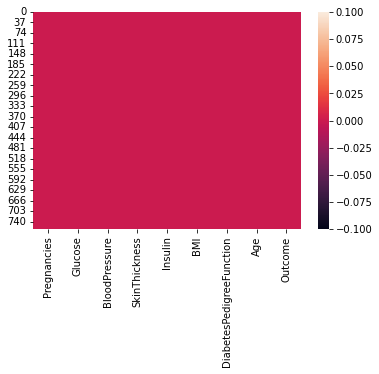

In [8]:
sns.heatmap(data.isnull())

In [9]:
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

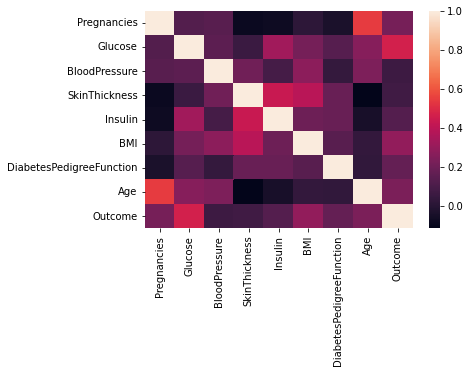

In [10]:
sns.heatmap(correlation)

In [14]:
X=data.drop("Outcome",axis=1)
Y=data['Outcome']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
254,12,92,62,7,258,27.6,0.926,44
702,1,168,88,29,0,35.0,0.905,52
654,1,106,70,28,135,34.2,0.142,22
765,5,121,72,23,112,26.2,0.245,30
274,13,106,70,0,0,34.2,0.251,52
...,...,...,...,...,...,...,...,...
179,5,130,82,0,0,39.1,0.956,37
277,0,104,64,23,116,27.8,0.454,23
135,2,125,60,20,140,33.8,0.088,31
61,8,133,72,0,0,32.9,0.270,39


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [22]:
model=LogisticRegression(solver='saga',max_iter=2000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=2000, solver='saga')

In [24]:
predictions=model.predict(X_test)
print(predictions)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1]


In [25]:
accuracy=accuracy_score(predictions,Y_test)
print(accuracy)

0.7272727272727273
